# The Task

The [Swap test](https://en.wikipedia.org/wiki/Swap_test) is a simple quantum circuit which, given two states, allows to compute how much do they differ from each other.

1. Provide a variational (also called parametric) circuit which is able to generate the most general 1 qubit state. By most general 1 qubit state we mean that there exists a set of the parameters in the circuit such that any point in the Bloch sphere can be reached. Check that the circuit works correctly by showing that by varying randomly the parameters of your circuit you can reproduce correctly the Bloch sphere.

2. Use the circuit built in step 1) and, using the SWAP test, find the best choice of your parameters to reproduce a randomly generated quantum state made with 1 qubit.

3. Suppose you are given with a random state, made by N qubits, for which you only know that it is a product state and each of the qubits are in the state | 0 > or | 1>. By product state we mean that it can be written as the product of single qubit states, without the need to do any summation. For example, the state
|a> = |01>
Is a product state, while the state
|b> = |00> + |11>
Is not.

Perform a qubit by qubit SWAP test to reconstruct the state. This part of the problem can be solved via a simple grid search.


# Solution
## Section 1: Introduction
Before running down on the solution. Let's take a brief introduction to the qubits and the python library qiskit. 

### Subsection 1.1: Qubit
A qubit is a two-state system that can be realized in a state of superposition composed by two orthonormal basis states of $|0\rangle$ and $|1\rangle$. Expressed as following.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$|\Psi\rangle$ = $\alpha$$|0\rangle$ + $\beta$$|1\rangle$

Here, $\alpha$ and $\beta$ are the probability amplitudes along with the two basis states respectively. Whose square of norms are the probabilities for the qubit to collapse over the same. Following the normalization of the qubit $|\Psi\rangle$.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$|\alpha|^2$ + $|\beta|^2$ = 1

### Subsection 1.1: Bloch Sphere
Bloch Sphere is a unit sphere. All the points on its surface are traced by the vector representation of the qubit. The convention is to associate the positive z-axis to angle and the other one to angle. It puts an angle of pi between these two orthonormal states. Immediately, it seems to be a counterintuitive approach. However, together with all of these cases, the idea of probability amplitudes ($\alpha$ and $\beta$) are expressible in polar coordinates makes us ready to choose the Hopf coordinates forfor the representation of the Bloch Sphere as illustrated below.

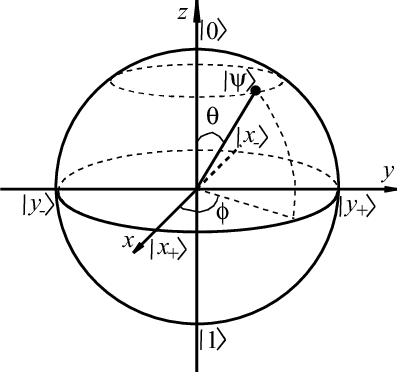

Source: Cong, Shuang. (2008). The analysis of two-level Quantum system states and control in the Bloch ball. 618-622. 10.1109/CHICC.2008.4604907.

In the desired co-ordinate we make $\alpha = cos(\frac{\theta}{2})e^{i\phi_{1}}$ and $\beta = sin(\frac{\theta}{2})e^{i\phi_{2}}$. The two angles have the ranges $0 ≤ \theta ≤ \pi$, $0 ≤ \phi_{1} < 2\pi$ and $0 ≤ \phi_{2} < 2\pi$. The subsequent qubit becomes as below.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$|\Psi\rangle = cos(\frac{\theta}{2})e^{i\phi_{1}}|0\rangle + sin(\frac{\theta}{2})e^{i\phi_{2}}|1\rangle$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$|\Psi\rangle$ = $e^{i\phi_{1}} (cos(\frac{\theta}{2})|0\rangle + sin(\frac{\theta}{2})e^{i(\phi_{2}- \phi_{1})}|1\rangle)$

We can arbitarily choose $e^{i\phi_{1}}$ to be equal to 1 and take $e^{i(\phi_{1} - \phi_{1})} = e^{i\phi}$. Eventually the qubit finalizes to following form.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$|\Psi\rangle$ = $cos(\frac{\theta}{2})|0\rangle + sin(\frac{\theta}{2})e^{i\phi}|1\rangle$

<!-- We can arbitarily change $\phi_{1}$ to $\phi$ which results in a phase between it and $\phi_{2}$. So, $\phi_{2}$ = $\phi + \lambda$ -->

In [ ]:
# %pip install qiskit
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer
from qiskit.circuit import Parameter
import numpy as np

# Spherical Parameters
theta_param = Parameter("theta")
phi_param = Parameter("phi")
lambda_param = Parameter("lambda")
# Quantum Circuit acting on a quantum register with one qubit
qubit = QuantumRegister(1)
parametrized_qc = QuantumCircuit(qubit)

# Apply the general rotation operator
parametrized_qc.u3(theta_param, phi_param, lambda_param , qubit)


size = 10
theta_range = np.linspace(0, np.pi, size)
phi_range = np.linspace(0, 2*np.pi, size)

for theta in theta_range:
    for phi in phi_range:
        backend = Aer.get_backend('statevector_simulator')
        state = execute(parametrized_qc.bind_parameters({theta_param: theta, phi_param: phi, lambda_param: np.pi/2.0}), backend).result().get_statevector()
        print(np.linalg.norm(state))